<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/Copy_of_Classify_different_antennas_900_245_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar  3 21:49:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/R900_245_4.mat')

In [4]:
print(list(matlab_data.keys())[3:])

['R900_T2450_test', 'R900_T2450_train', 'R900_T500_test', 'R900_T500_train', 'R900_T900_test', 'R900_T900_train', 'R900_lime_test', 'R900_lime_train']


In [0]:
train_900=matlab_data['R900_T900_train']
train_2450=matlab_data['R900_T2450_train']
train_500=matlab_data['R900_T500_train']


In [21]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
# test_900=matlab_data['R900_T900_test']
# test_2450=matlab_data['R900_T2450_test']
# test_500=matlab_data['R900_T500_test']


In [0]:
# print(test_900.shape)
# print(test_2450.shape)
# print(test_500.shape)

In [24]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(79094137, 2)
(78204989, 2)
(80362202, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[:41943040]
train_2450=train_2450[:41943040]
train_500=train_500[:41943040]





In [0]:
# test_900=test_900[1000000:9388608]
# test_2450=test_2450[1000000:9388608]
# test_500=test_500[1000000:9388608]



In [26]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
# test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
# print(test_x.shape)


(125829120, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
# test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
# train_y[3*seprator:]=3
#Creating test_y
# test_y=np.zeros(len(test_x))
# seprator=int(len(test_y)/n_classes)
# test_y[0:seprator]=0
# test_y[seprator:2*seprator]=1
# test_y[2*seprator:3*seprator]=2
# # test_y[3*seprator:]=3


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
# test_y=tf.keras.utils.to_categorical(
#     test_y,
#     num_classes=n_classes,
#     dtype='float32'
# )

In [32]:
print(train_x.shape)
print(train_y.shape)

(983040, 2, 128)
(983040, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
# test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [34]:
print(input_shape)
print(train_x.shape)
print(train_y.shape)

(128, 2, 1)
(983040, 128, 2, 1)
(983040, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.25, shuffle= True)

In [0]:
train_x, valid_x, train_y,valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [40]:

conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10)

Train on 589824 samples, validate on 147456 samples
Epoch 1/10
589824/589824 [==============================] - 183s 310us/sample - loss: 0.3631 - acc: 0.8351 - val_loss: 0.1850 - val_acc: 0.9177
Epoch 2/10
589824/589824 [==============================] - 177s 300us/sample - loss: 0.2709 - acc: 0.8754 - val_loss: 0.1831 - val_acc: 0.9202
Epoch 3/10
589824/589824 [==============================] - 177s 300us/sample - loss: 0.2462 - acc: 0.8858 - val_loss: 0.2842 - val_acc: 0.9273
Epoch 4/10
589824/589824 [==============================] - 177s 300us/sample - loss: 0.2230 - acc: 0.8976 - val_loss: 0.1764 - val_acc: 0.9240
Epoch 5/10
589824/589824 [==============================] - 178s 302us/sample - loss: 0.2100 - acc: 0.9019 - val_loss: 0.1708 - val_acc: 0.9250
Epoch 6/10
589824/589824 [==============================] - 177s 300us/sample - loss: 0.2011 - acc: 0.9061 - val_loss: 0.1842 - val_acc: 0.9312
Epoch 7/10
589824/589824 [==============================] - 177s 300us/sample - loss

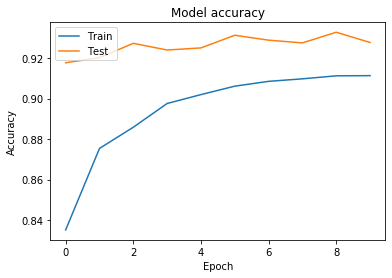

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

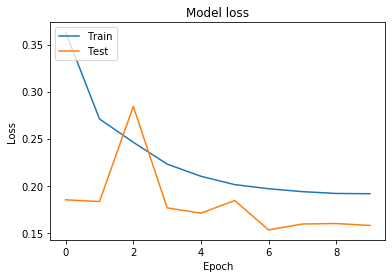

In [42]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [44]:
conv_model.evaluate(test_x,test_y)

245760/245760 [==============================] - 24s 99us/sample - loss: 0.1591 - acc: 0.9283


[0.1590807584707709, 0.9283407]

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


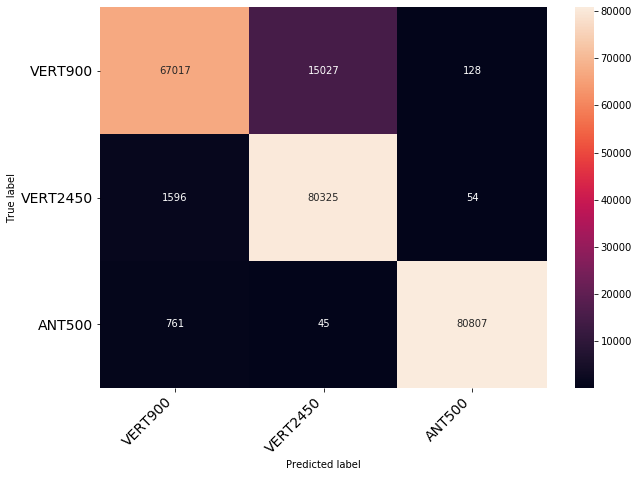

In [48]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))